In [7]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
path = r'C:\Users\rinde\Downloads\Instacart-Basket-Analysis-11-2023\Instacart Basket Analysis 11-2023'

In [9]:
df_big=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_big.pkl'))

In [10]:
# Task 3 Creating Histogram

In [11]:
df_big.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,First Name,Surnam,Gender,State,Age,dependants,family_status,income,_merge
0,33664,2 % Reduced Fat Milk,84,16,99999.0,183964,873,prior,3,0,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
1,33664,2 % Reduced Fat Milk,84,16,99999.0,1851256,873,prior,4,6,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
2,9020,Boneless Skinless Chicken Thighs,35,12,25.0,696790,873,prior,5,6,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
3,7877,Chicken Thighs,49,12,23.0,183964,873,prior,3,0,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both
4,33464,Fresh Boneless Skinless Chicken Breasts,49,12,22.0,1744567,873,prior,2,0,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both


<Axes: ylabel='Frequency'>

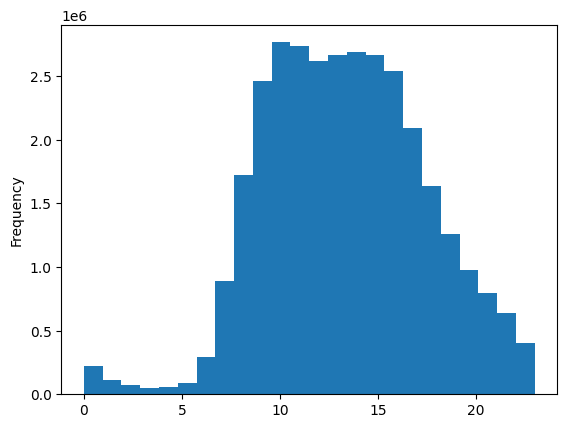

In [12]:
df_big['order_hour_of_day'].plot.hist(bins = 24)

In [13]:
# Histogram shows frequency of orders placed durign 24 hours cycle, with highest activity between 10 a.m. to 4 p.m.

In [14]:
# Task 4 distribution of orders among customers in terms of loyality

<Axes: xlabel='loyalty_flag'>

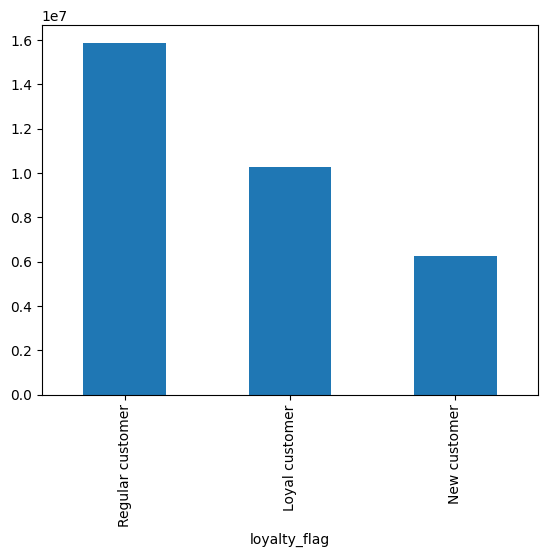

In [15]:
#Creating loyalty_flag bar chart
df_big['loyalty_flag'].value_counts().plot.bar()

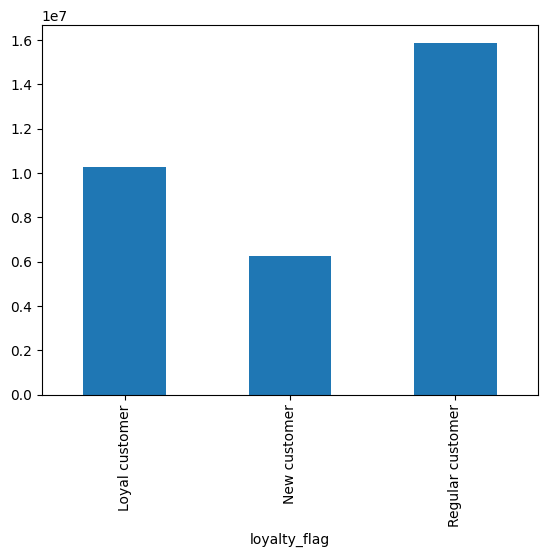

In [16]:
bar=df_big['loyalty_flag'].value_counts().sort_index().plot.bar()

In [17]:
df_big['loyalty_flag'].value_counts().sort_index()

loyalty_flag
Loyal customer      10293737
New customer         6249398
Regular customer    15891077
Name: count, dtype: int64

In [18]:
# Task 5 check whether there's a difference in expenditure (The "prices" column) depedning on the hour of the day

In [19]:
#Creating sample
np.random.seed(4)
dev = np.random.rand(len(df_big)) <= 0.7

In [20]:
dev

array([False,  True, False, ..., False,  True,  True])

In [21]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [22]:
#Store 70% of the sample in the dataframe big
big = df_big[dev]

In [23]:
#Store 30% of the sample in the dataframe small
small = df_big[~dev]

In [24]:
len(df_big)

32434212

In [25]:
len(big) + len(small)

32434212

In [26]:
#Create new dataframe
df_2=small[['order_hour_of_day','prices']]

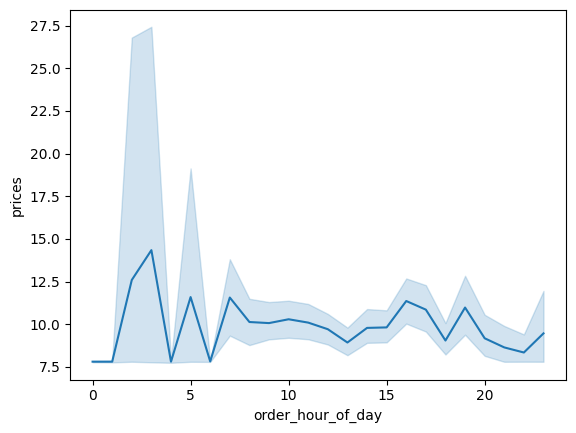

In [27]:
#Create Line Chart for the 30% sample
line_order_hour_of_day=sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')

In [28]:
#Exporting the line chart
line_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day.png'))

In [29]:
# Task 6 check if there is a connection between age and number dependants

In [30]:
#Create sample
np.random.seed(4)

In [31]:
dev = np.random.rand(len(df_big)) <= 0.7

In [32]:
dev

array([False,  True, False, ..., False,  True,  True])

In [33]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [34]:
#Store 70% of the sample in the dataframe big
big = df_big[dev]

In [35]:
#Store 30% of the sample in the dataframe small
small = df_big[~dev]

In [36]:
len(df_big)

32434212

In [37]:
len(big) + len(small)

32434212

In [38]:
df_big.head(1)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,frequency_flag,First Name,Surnam,Gender,State,Age,dependants,family_status,income,_merge
0,33664,2 % Reduced Fat Milk,84,16,99999.0,183964,873,prior,3,0,...,Frequent Customer,Edward,Carr,Male,Colorado,64,3,married,290220,both


In [39]:
#Creating new dataframe
df_3=small[['dependants', 'Age']]

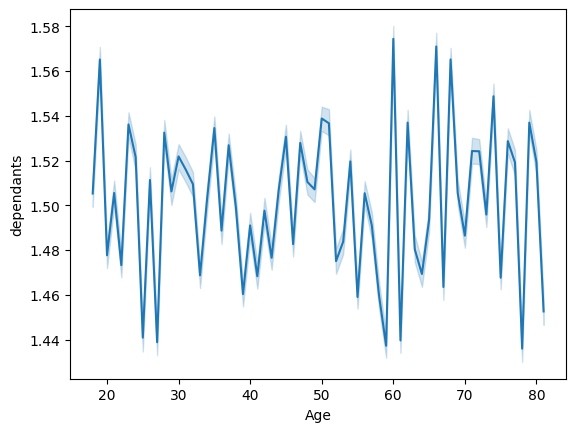

In [40]:
#Create Line Chart for the 30% sample
line_dependants=sns.lineplot(data=df_3, x='Age', y='dependants')

In [41]:
line_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dependants.png'))

In [42]:
# The line chart does not show a correlation between age and number of dependants

In [43]:
# Task 7 connection between age and spending power (income)

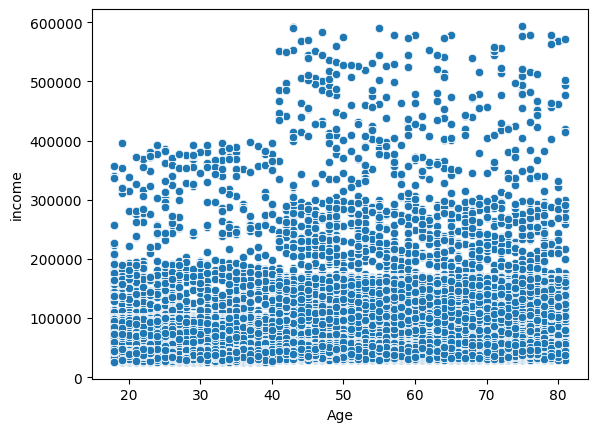

In [44]:
#Create scatterplot
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_big)

In [45]:
#Exporting the scatterplot
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

In [46]:
# The scatterplot shows the highest income concentration across all ages is between 0.00-200,000, followed by 200,000-300,000 for those over 40.
# Income Values of 200,000-400,000 are observed acress all the age groups, with scattered values 300,000-600,000 in the 40+ age range.